In [1]:
include("./param.jl");
include("./aux_functions.jl");

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/dimitrios/.julia/packages/Plots/uCh2y/src/backends/hdf5.jl", 162, UndefVarError(:HDF5Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f503be61843, Ptr{Nothing} @0x00007f503beee17c, Ptr{Nothing} @0x00007f503beee73b, Ptr{Nothing} @0x00007f503beee389, Ptr{Nothing} @0x00007f503beee8f0, Ptr{Nothing} @0x00007f503beef9c8, Ptr{Nothing} @0x00007f503bef0616, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f503bf08e08, Ptr{Nothing} @0x00007f503bf0978e, Ptr{Nothing} @0x00007f503bf0913a, Ptr{Nothing} @0x00007f503bf093c8, Ptr{Nothing} @0x00007f503bee4105, Ptr{Nothing} @0x00007f503bf0a15d, Ptr{Nothing} @0x00007f502e1a5fa1, Ptr{Nothing} @0x00007f4ff4d874ec, Ptr{Nothing} @0x00007f503beee75b, Ptr{Nothing} @0x00007f503beee389, Ptr{Nothing} @0x00007f503beee8f0, Ptr{Nothing} @0x00007f503beef9c8, Ptr{Nothing} @0x00007f503bef0616, Base.InterpreterI

In [2]:
using Main.aux_functions
using Main.param

using ADCME
using SparseArrays

using DelimitedFiles
using Dates
using Plots

In [3]:
param_model_val = param_model();
tf_variables, h_t, q_t_x, q_t_y = Darcy_flow_solver(param_model_val);

In [4]:
loss, opt_ADAM, opt_LFGS, opt_ADAM_sum, opt_LFGS_sum, diff_eval,p_pre_soft_max, p = Info_upscale(tf_variables,param_model_val,q_t_x, q_t_y)

3.41659009037476e-5/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-pac

(PyObject <tf.Tensor 'add_72:0' shape=() dtype=float64>, PyObject <tf.Operation 'Adam' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f4f59120dd0>, PyObject <tf.Operation 'Adam_1' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f4f53e46b50>, PyObject <tf.Tensor 'Max_1:0' shape=() dtype=float64>, PyObject <tf.Variable 'Variable_3:0' shape=(1, 64) dtype=float64_ref>, PyObject <tf.Tensor 'Softmax:0' shape=(1, 64) dtype=float64>)

In [5]:
sess = Session(); init(sess);

2021-04-18 23:00:43.188662: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-04-18 23:00:43.211627: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2021-04-18 23:00:43.212489: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557204558390 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-04-18 23:00:43.212526: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-04-18 23:00:43.215006: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-18 23:00:43.219934: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-04-18 23:00:43.219960: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retr

In [14]:
check = run(sess,q_t_x)

9-element Array{Array{Float64,3},1}:
 [1.9146442301229953e-5 1.914631104919696e-5 … 1.9146304132443797e-5 1.914621221772658e-5; 1.9819138215943235e-5 1.9819166370974995e-5 … 1.981913724825889e-5 1.9819041292096883e-5; … ; 1.3333091480607036e-5 1.3333036710457371e-5 … 1.3333420539115984e-5 1.33330281981763e-5; 1.3332995833391008e-5 1.3333320638798682e-5 … 1.3333006251068581e-5 1.3333205314136866e-5]
 [1.914644230101838e-5 1.9146311049164808e-5 … 1.914630413241673e-5 1.914621221772555e-5; 1.818840492275162e-5 1.818843051009499e-5 … 1.8188404043284425e-5 1.8188316838470742e-5; … ; 1.2778247944013801e-5 1.2778195707739945e-5 … 1.2778561765226019e-5 1.2778187591715479e-5; 1.2778156725331762e-5 1.2778466491897374e-5 … 1.2778166658978793e-5 1.2778356507069512e-5]
 [1.9146442300806812e-5 1.9146311049132654e-5 … 1.914630413238966e-5 1.9146212217724526e-5; 1.7509826458969628e-5 1.7509850977083926e-5 … 1.7509825616307818e-5 1.7509742055776717e-5; … ; 1.254705002043848e-5 1.2546998839193229e-5 … 1

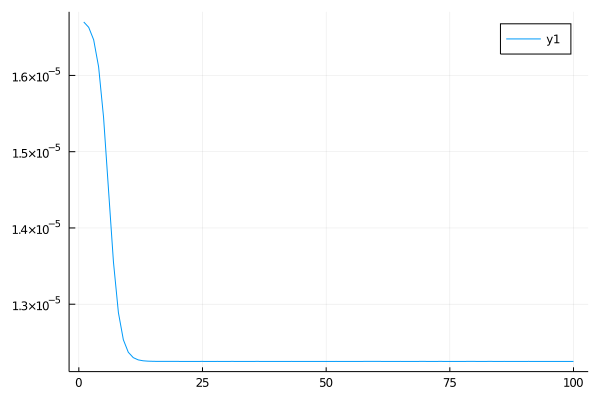

In [15]:
plot(check[5][:,1,1])

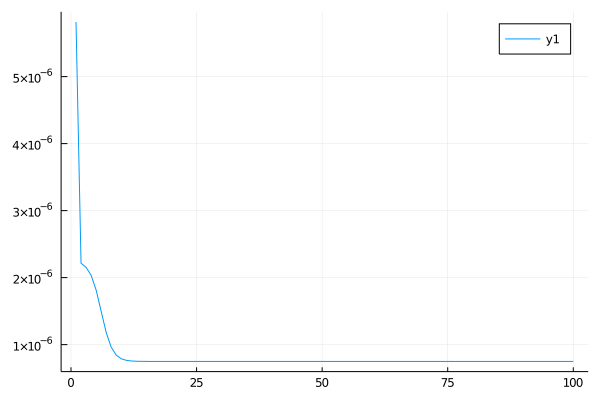

In [13]:
plot(check[5][:,1,1])